# Clustering - march 16th

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from IPython.core.display import HTML

In [2]:
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

### Read data

In [3]:
df = pd.read_csv('dev.csv')
df

,ID,Parent,Component,Line,Column,EndLine,EndColumn,CC,CCL,CCO,...,Naming.Rules,Optimization.Rules,Security.Code.Guideline.Rules,Size.Metric.Rules,Strict.Exception.Rules,String.and.StringBuffer.Rules,Type.Resolution.Rules,Unnecessary.and.Unused.Code.Rules,Vulnerability.Rules,bugs
0,L725,L874,L103,44,1,223,2,0.082397,1,3,...,0,0,0,3,0,0,0,0,0,False
1,L7984,L8766,L103,10,1,43,2,0.000000,0,0,...,0,0,0,0,0,0,0,0,0,False
2,L6110,L5338,L103,14,1,67,2,0.000000,0,0,...,0,0,0,1,0,0,0,0,0,False
3,L7289,L6714,L103,13,1,59,2,0.543860,1,4,...,2,0,0,0,0,0,0,0,0,False
4,L4437,L8973,L103,9,1,34,2,0.000000,0,0,...,0,0,0,0,0,0,0,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71802,L1602,L20362,L103,33,1,86,2,0.441441,1,1,...,0,0,0,3,0,0,0,0,0,False
71803,L771,L37692,L103,29,1,85,2,0.000000,0,0,...,1,2,0,1,0,0,0,0,0,False
71804,L30823,L30750,L103,308,87,313,18,0.000000,0,0,...,0,0,0,0,0,0,0,0,0,False
71805,L50337,L50312,L103,118,111,128,10,1.000000,2,6,...,0,0,0,0,0,0,0,0,0,False


### Elbow method

-> used to find the best number of clusters

In [31]:
df_cluster = df_copy.copy()

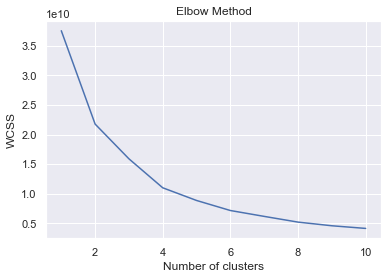

In [32]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_cluster)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [33]:
kmeans = KMeans(4)
kmeans.fit(df_cluster)

KMeans(n_clusters=4)

In [34]:
identified_clusters = kmeans.fit_predict(df_cluster)
identified_clusters

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [35]:
data_with_clusters = df_cluster.copy()
data_with_clusters['Clusters'] = identified_clusters 

In [36]:
data_with_clusters

,Line,Column,EndLine,EndColumn,CCL,CCO,CI,LDC,LLDC,LCOM5,...,Size.Metric.Rules,Strict.Exception.Rules,String.and.StringBuffer.Rules,Type.Resolution.Rules,Unnecessary.and.Unused.Code.Rules,bugs,ExecLines,ClonedExecLines,ClonedExecLinesOfCode,Clusters
0,44,1,223,2,1,3,1,10,10,1,...,3,0,0,0,0,False,179,10,12,1
1,10,1,43,2,0,0,0,0,0,1,...,0,0,0,0,0,False,33,0,0,1
2,14,1,67,2,0,0,0,0,0,1,...,1,0,0,0,0,False,53,0,0,1
3,13,1,59,2,1,4,2,22,22,1,...,0,0,0,0,0,False,46,22,25,1
4,9,1,34,2,0,0,0,0,0,1,...,0,0,0,0,0,False,25,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71802,33,1,86,2,1,1,1,10,10,0,...,3,0,0,0,0,False,53,10,12,1
71803,29,1,85,2,0,0,0,0,0,1,...,1,0,0,0,0,False,56,0,0,1
71804,308,87,313,18,0,0,0,0,0,0,...,0,0,0,0,0,False,5,0,0,1
71805,118,111,128,10,2,6,2,11,11,0,...,0,0,0,0,0,False,10,10,11,1


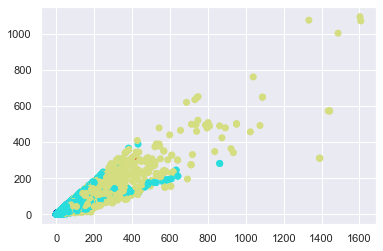

In [37]:
plt.scatter(data_with_clusters['WarningInfo'],data_with_clusters['Documentation.Metric.Rules'],c=data_with_clusters['Clusters'],cmap='rainbow')